In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
price_data=pd.read_csv(r"C:\Users\naila.iram\Downloads\BitCoin Analysis\bitcoin_price.csv")
price_data.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [3]:
price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [4]:
price_data.shape

(1556, 7)

In [5]:
price_data.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [6]:
price_data.duplicated().sum()

0

In [7]:
price_data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [8]:
price_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [9]:
price_data['Date'] = pd.to_datetime(price_data['Date'])

In [10]:
price_data.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

## EDA

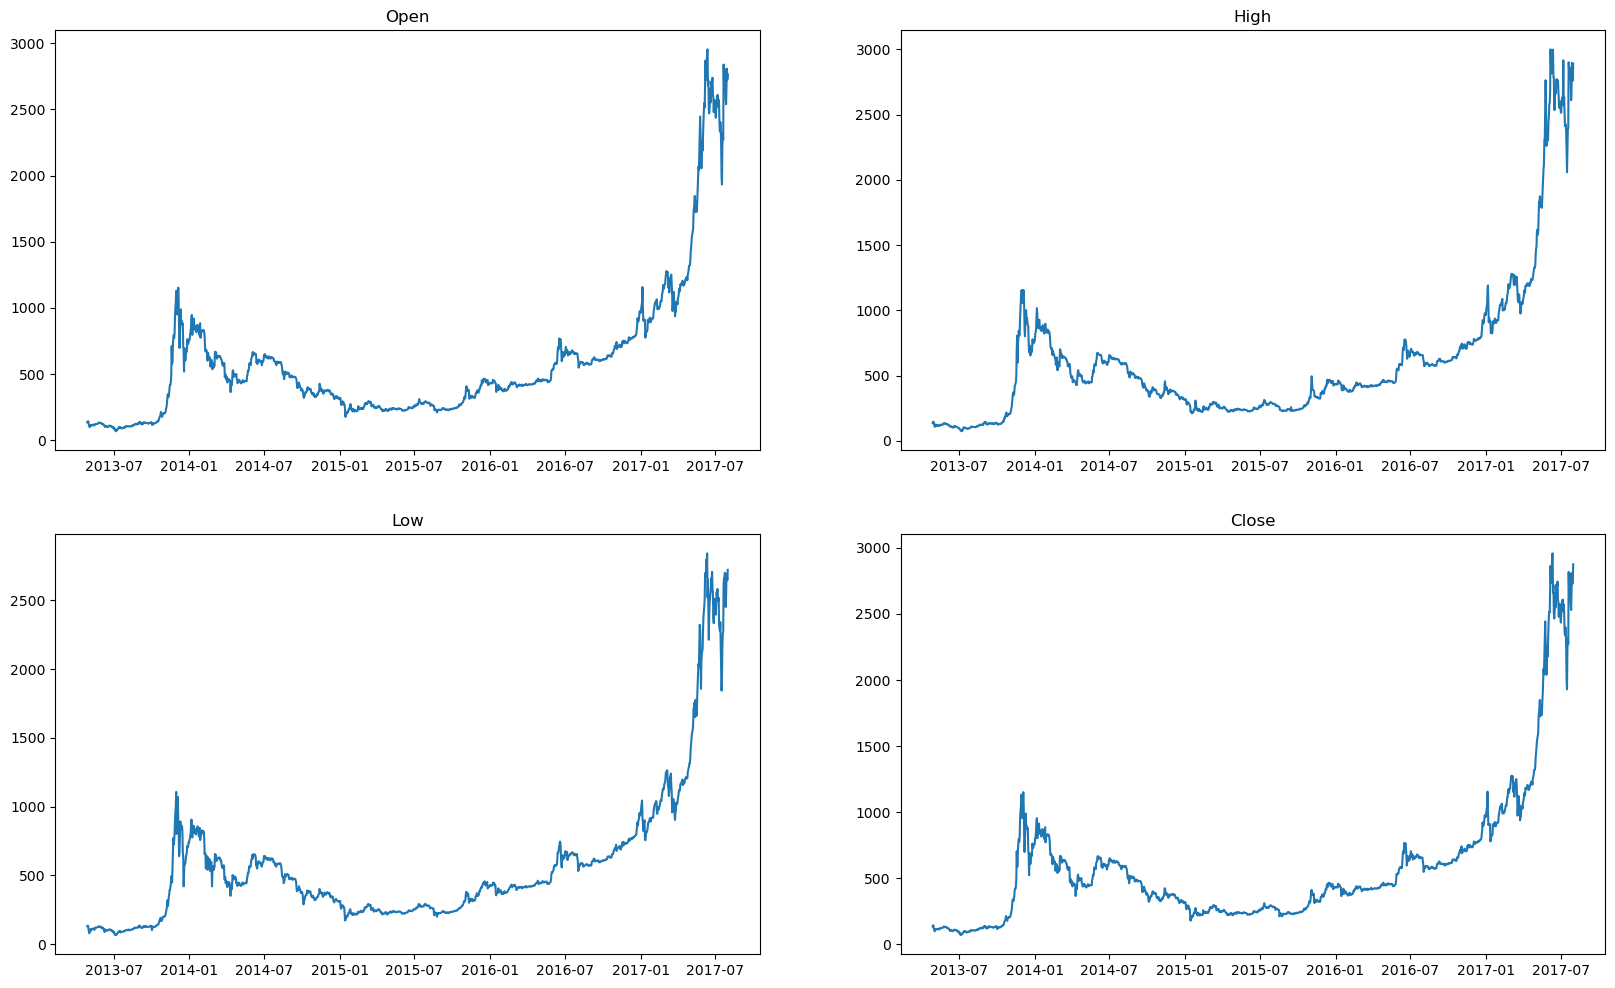

In [11]:
### What was the change in price of the stock overtime? 
plt.figure(figsize=(20,12))
for index , col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(price_data['Date'],price_data[col])
    plt.title(col)

In [12]:
### showing the distriution on candle chart (OHLC)
bitcoin_sample=price_data[0:50]

In [13]:
!pip install chart_studio
!pip install plotly

In [14]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px
from plotly.offline import download_plotlyjs , init_notebook_mode ,plot ,iplot

In [15]:
init_notebook_mode(connected=True)

In [17]:
trace= go.Candlestick(x=bitcoin_sample['Date'], 
               high=bitcoin_sample['High'], 
               open=bitcoin_sample['Open'], 
               close=bitcoin_sample['Close'], 
               low=bitcoin_sample['Low'])

C:\Users\naila.iram\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [18]:
candle_data=[trace]

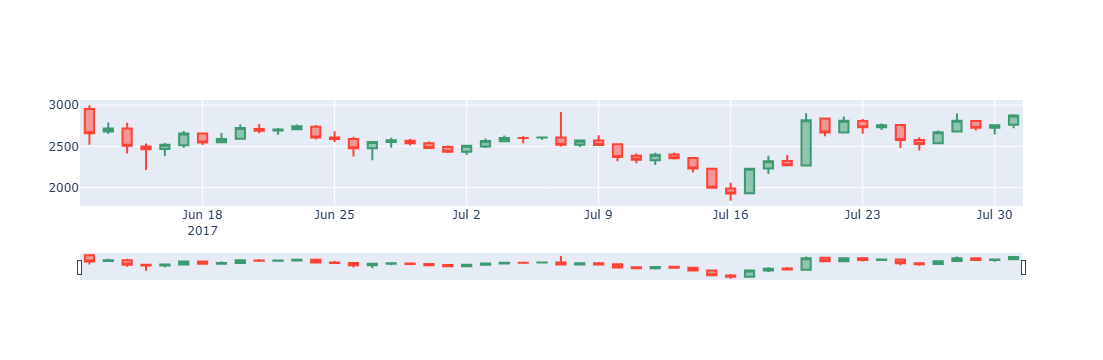

<Figure size 1500x1500 with 0 Axes>

In [23]:
plt.figure(figsize=(15,15))
go.Figure(data=candle_data)

In [24]:
### Analyzing Closeing Price 
price_data.set_index('Date',inplace=True)

In [26]:
price_data.head(2)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


<Axes: xlabel='Date'>

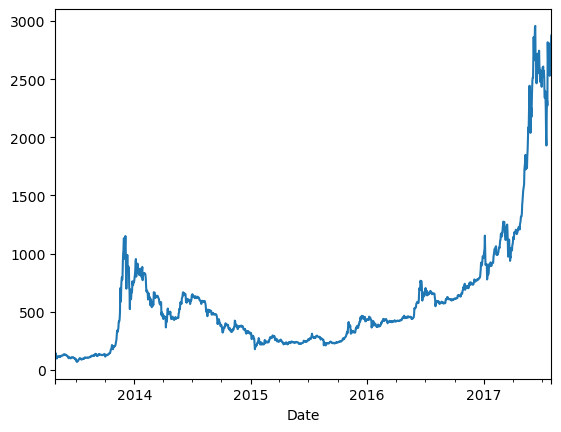

In [27]:
price_data['Close'].plot()

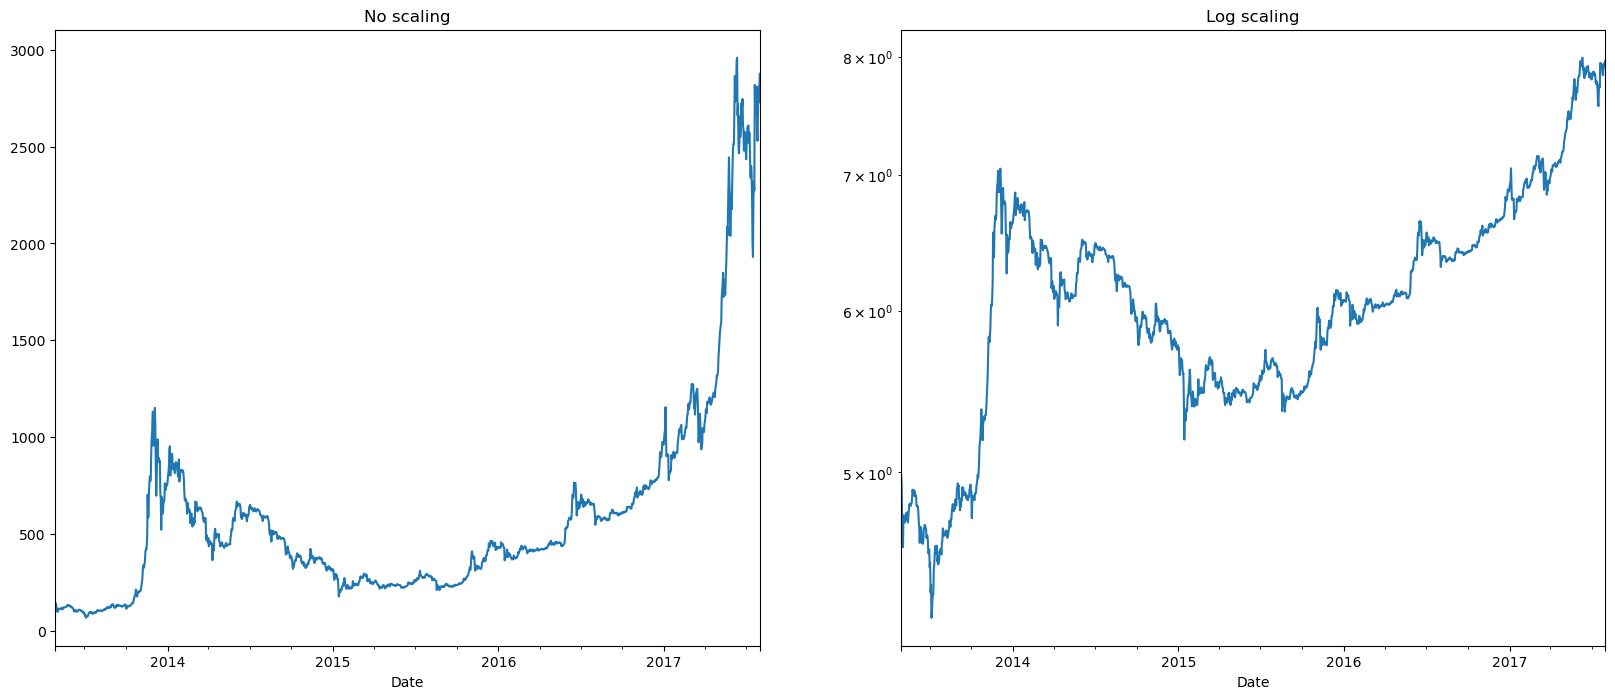

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
price_data['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(price_data['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

In [31]:
### Analysis on closing price on Yearly,quarterly and monthly basis
## (resampling will be done ,so make sure date is ur row index)
## Yearly 

price_data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

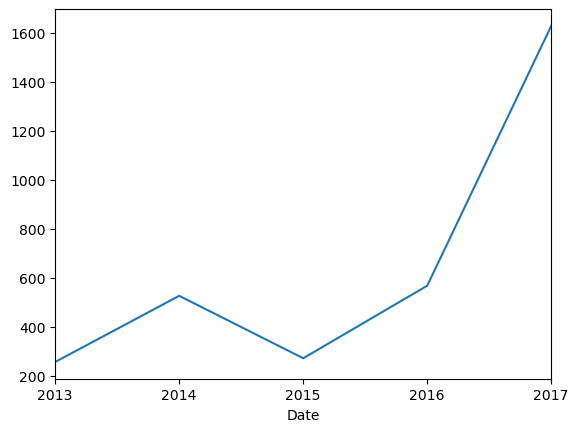

In [32]:
price_data['Close'].resample('Y').mean().plot()

In [38]:
price_data['Close'].resample('Q').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: Q-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

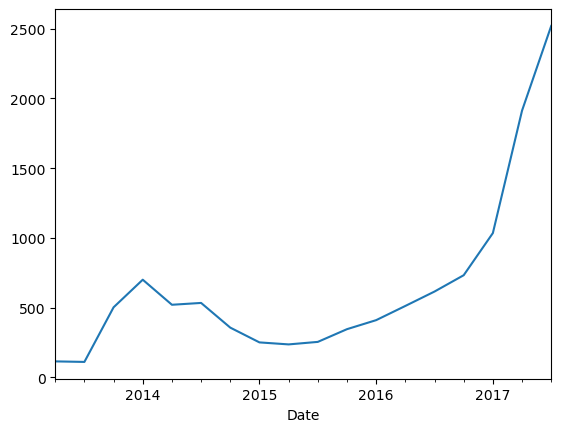

In [34]:
price_data['Close'].resample('Q').mean().plot()

In [36]:
price_data['Close'].resample('M').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<Axes: xlabel='Date'>

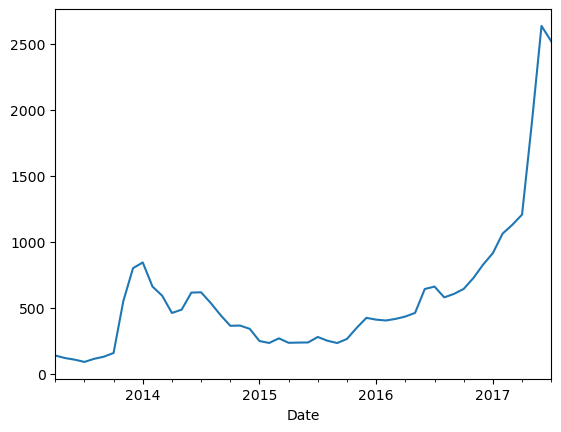

In [37]:
price_data['Close'].resample('M').mean().plot()

In [40]:
### Analyzing Daily change in closing price

price_data['Close_price_pct_change']=price_data['Close'].pct_change()*100

<Axes: xlabel='Date'>

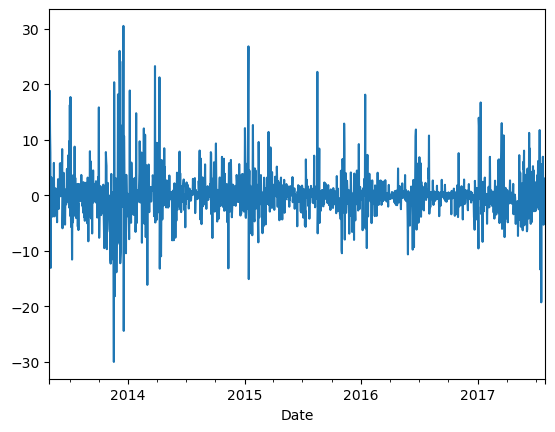

In [41]:
price_data['Close_price_pct_change'].plot()

In [45]:
!pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ------------------- ------------------ 41.0/81.7 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 760.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=48644f57b1cba6a6e7beacb66e40561d019fb4cc0e7a3f40c2ec0a6e0717aab2
  Stored in directory: c:\users\naila.iram\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks


In [46]:
import cufflinks as cf

In [47]:
cf.go_offline()

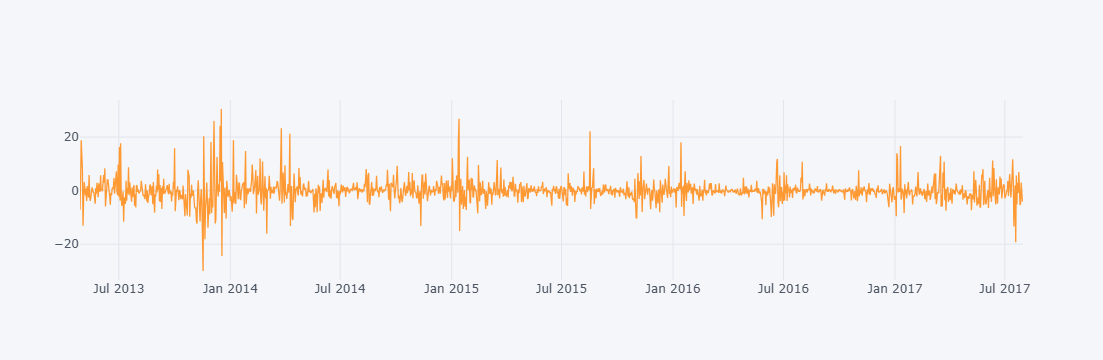

In [49]:
price_data['Close_price_pct_change'].iplot()